In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data_info = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
data_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
data_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz') 
data_reviews = pd.read_csv('data/zippedData/rotten_tomatoes_critic_reviews.csv.gz')
data_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

In [2]:
data_movies.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [3]:
data_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [4]:
new_movie = data_info.loc[:,('movie_title','critics_consensus','actors','production_company','tomatometer_status','tomatometer_rating','audience_rating','tomatometer_rotten_critics_count')]

new_movie.head(1)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76


In [5]:
data_ratings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [6]:
data_reviews.head(2)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


In [7]:
movie_overview= pd.merge(new_movie,data_budgets,how='inner',left_on='movie_title',right_on='movie')

In [8]:
movie_overview2 = pd.merge(movie_overview,data_movies, how='inner', left_on='movie_title',right_on='title')
movie_overview_columnDrop = movie_overview2.drop(['domestic_gross','movie','genre_ids','original_title','title','original_language','release_date_x','id_x'], axis = 1)
movie_overview_columnDrop

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
2,Criminal,"If you saw Nine Queens, it may feel redundant,...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",Warner Bros. Pictures,Fresh,69.0,57.0,39,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
4,Going the Distance,NaN,"Christopher Jacot, Shawn Roberts, Ryan Bellevi...",Séville Pictures,Rotten,0.0,61.0,5,"$32,000,000","$43,603,990",38073,8.281,2010-09-03,6.0,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,"$85,000,000","$83,080,084",285135,4.180,2014-08-16,3.8,49
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,"$80,000,000","$170,805,525",38317,10.764,2011-07-08,5.3,886
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,"$50,000,000","$55,348,693",329833,12.997,2016-02-12,4.7,1374
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,"$35,000,000","$12,506,188",351065,3.434,2016-09-02,5.5,43


In [9]:
example = movie_overview_columnDrop.copy()       #reason to create a shallow copy?
example.actors = example.actors.str.split(',')

In [10]:
example.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"[Logan Lerman, Brandon T. Jackson, Alexandra...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"[Catherine Keener, Amanda Peet, Oliver Platt...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


In [11]:
example = example.explode('actors')

In [12]:
example

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,Logan Lerman,20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,Brandon T. Jackson,20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,Alexandra Daddario,20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,Jake Abel,20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,Sean Bean,20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,Zootopia,The brilliantly well-rounded Zootopia offers a...,Jenny Slate,Walt Disney Animation Studios,Certified-Fresh,98.0,92.0,7,"$150,000,000","$1,019,429,616",269149,27.549,2016-03-04,7.7,9977
2499,Zootopia,The brilliantly well-rounded Zootopia offers a...,Nate Torrence,Walt Disney Animation Studios,Certified-Fresh,98.0,92.0,7,"$150,000,000","$1,019,429,616",269149,27.549,2016-03-04,7.7,9977
2499,Zootopia,The brilliantly well-rounded Zootopia offers a...,Bonnie Hunt,Walt Disney Animation Studios,Certified-Fresh,98.0,92.0,7,"$150,000,000","$1,019,429,616",269149,27.549,2016-03-04,7.7,9977
2499,Zootopia,The brilliantly well-rounded Zootopia offers a...,Don Lake,Walt Disney Animation Studios,Certified-Fresh,98.0,92.0,7,"$150,000,000","$1,019,429,616",269149,27.549,2016-03-04,7.7,9977


In [13]:
example.columns

Index(['movie_title', 'critics_consensus', 'actors', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'audience_rating',
       'tomatometer_rotten_critics_count', 'production_budget',
       'worldwide_gross', 'id_y', 'popularity', 'release_date_y',
       'vote_average', 'vote_count'],
      dtype='object')

In [14]:
example = example[example.actors.isin(example.actors.value_counts()[:100].index.tolist())]

In [15]:
example = pd.get_dummies(example, columns = ['actors'])

In [16]:
example[example.columns[15:].tolist() + ['worldwide_gross']].corr()

,actors_ Alan Tudyk,actors_ Alexander Flores,actors_ Amy Adams,actors_ Ananais J. Dixon,actors_ Anthony Mackie,actors_ April M. Lawrence,actors_ April Winchell,actors_ Beau Knapp,actors_ Ben Kingsley,actors_ Ben Mendelsohn,...,actors_Gbenga Akinnagbe,actors_Jim Parsons,actors_Johnny Depp,actors_Liam Neeson,actors_Marcia Gay Harden,actors_Mary Rigby-Abernathy,actors_Matt Damon,actors_Tom Cruise,actors_Tom Hardy,actors_Yann Arthus-Bertrand
actors_ Alan Tudyk,1.000000,-0.010834,-0.009103,-0.010127,-0.010127,-0.010127,-0.010127,-0.010127,-0.009369,-0.009103,...,-0.010127,-0.010127,-0.009103,-0.009369,-0.010127,-0.010127,-0.009103,-0.009628,-0.009369,-0.010127
actors_ Alexander Flores,-0.010834,1.000000,-0.009512,-0.010582,-0.010582,-0.010582,-0.010582,-0.010582,-0.009790,-0.009512,...,-0.010582,-0.010582,-0.009512,-0.009790,-0.010582,-0.010582,-0.009512,-0.010061,-0.009790,-0.010582
actors_ Amy Adams,-0.009103,-0.009512,1.000000,-0.008892,-0.008892,-0.008892,-0.008892,-0.008892,-0.008226,-0.007992,...,-0.008892,-0.008892,-0.007992,-0.008226,-0.008892,-0.008892,-0.007992,-0.008454,-0.008226,-0.008892
actors_ Ananais J. Dixon,-0.010127,-0.010582,-0.008892,1.000000,-0.009892,-0.009892,-0.009892,-0.009892,-0.009151,-0.008892,...,-0.009892,-0.009892,-0.008892,-0.009151,-0.009892,-0.009892,-0.008892,-0.009404,-0.009151,-0.009892
actors_ Anthony Mackie,-0.010127,-0.010582,-0.008892,-0.009892,1.000000,-0.009892,-0.009892,-0.009892,-0.009151,-0.008892,...,-0.009892,-0.009892,-0.008892,-0.009151,-0.009892,-0.009892,-0.008892,-0.009404,-0.009151,-0.009892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
actors_Mary Rigby-Abernathy,-0.010127,-0.010582,-0.008892,-0.009892,-0.009892,-0.009892,-0.009892,-0.009892,-0.009151,-0.008892,...,-0.009892,-0.009892,-0.008892,-0.009151,-0.009892,1.000000,-0.008892,-0.009404,-0.009151,-0.009892
actors_Matt Damon,-0.009103,-0.009512,-0.007992,-0.008892,-0.008892,-0.008892,-0.008892,-0.008892,-0.008226,-0.007992,...,-0.008892,-0.008892,-0.007992,-0.008226,-0.008892,-0.008892,1.000000,-0.008454,-0.008226,-0.008892
actors_Tom Cruise,-0.009628,-0.010061,-0.008454,-0.009404,-0.009404,-0.009404,-0.009404,-0.009404,-0.008701,-0.008454,...,-0.009404,-0.009404,-0.008454,-0.008701,-0.009404,-0.009404,-0.008454,1.000000,-0.008701,-0.009404
actors_Tom Hardy,-0.009369,-0.009790,-0.008226,-0.009151,-0.009151,-0.009151,-0.009151,-0.009151,-0.008467,-0.008226,...,-0.009151,-0.009151,-0.008226,-0.008467,-0.009151,-0.009151,-0.008226,-0.008701,1.000000,-0.009151


In [17]:
movie_overview_columnDrop.isnull().sum()

movie_title                           0
critics_consensus                   429
actors                               10
production_company                   18
tomatometer_status                    0
tomatometer_rating                    0
audience_rating                       5
tomatometer_rotten_critics_count      0
production_budget                     0
worldwide_gross                       0
id_y                                  0
popularity                            0
release_date_y                        0
vote_average                          0
vote_count                            0
dtype: int64

In [18]:
cellTotal = np.product(movie_overview_columnDrop.shape)

missing_values_count = movie_overview_columnDrop.isnull().sum()
total_missing = missing_values_count.sum()


percent_missing = (total_missing/cellTotal) * 100
print(percent_missing)

1.232


In [19]:
movie_overview_columnDrop

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
2,Criminal,"If you saw Nine Queens, it may feel redundant,...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",Warner Bros. Pictures,Fresh,69.0,57.0,39,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
4,Going the Distance,NaN,"Christopher Jacot, Shawn Roberts, Ryan Bellevi...",Séville Pictures,Rotten,0.0,61.0,5,"$32,000,000","$43,603,990",38073,8.281,2010-09-03,6.0,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,"$85,000,000","$83,080,084",285135,4.180,2014-08-16,3.8,49
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,"$80,000,000","$170,805,525",38317,10.764,2011-07-08,5.3,886
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,"$50,000,000","$55,348,693",329833,12.997,2016-02-12,4.7,1374
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,"$35,000,000","$12,506,188",351065,3.434,2016-09-02,5.5,43


In [20]:
movie_overview_dropNull = movie_overview_columnDrop.dropna()
movie_overview_dropNull

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
2,Criminal,"If you saw Nine Queens, it may feel redundant,...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",Warner Bros. Pictures,Fresh,69.0,57.0,39,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
5,Going the Distance,It's timelier and a little more honest than mo...,"Drew Barrymore, Justin Long, Charlie Day, Jaso...",New Line Cinema,Rotten,54.0,52.0,77,"$32,000,000","$43,603,990",38073,8.281,2010-09-03,6.0,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,"$85,000,000","$83,080,084",285135,4.180,2014-08-16,3.8,49
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,"$80,000,000","$170,805,525",38317,10.764,2011-07-08,5.3,886
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,"$50,000,000","$55,348,693",329833,12.997,2016-02-12,4.7,1374
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,"$35,000,000","$12,506,188",351065,3.434,2016-09-02,5.5,43


In [21]:
movie_overview_dropDuplicates = movie_overview_dropNull.drop_duplicates(subset=['movie_title'], keep='last')

In [22]:
movie_overview_dropDuplicates.isnull().sum()

movie_title                         0
critics_consensus                   0
actors                              0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
audience_rating                     0
tomatometer_rotten_critics_count    0
production_budget                   0
worldwide_gross                     0
id_y                                0
popularity                          0
release_date_y                      0
vote_average                        0
vote_count                          0
dtype: int64

In [23]:
movie_overview_dropDuplicates.head(3)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897


In [24]:
movie_overview_dropDuplicates['worldwide_gross']= movie_overview_dropDuplicates['worldwide_gross'].str.replace('$','').str.replace(',','')
movie_overview_dropDuplicates['production_budget']= movie_overview_dropDuplicates['production_budget'].str.replace('$','').str.replace(',','')

<ipython-input-24-3b2c94b9f95c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_overview_dropDuplicates['worldwide_gross']= movie_overview_dropDuplicates['worldwide_gross'].str.replace('$','').str.replace(',','')
<ipython-input-24-3b2c94b9f95c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_overview_dropDuplicates['production_budget']= movie_overview_dropDuplicates['production_budget'].str.replace('$','').str.replace(',','')


In [25]:
movie_overview_dropDuplicates.production_budget = movie_overview_dropDuplicates.production_budget.astype(int)
movie_overview_dropDuplicates.worldwide_gross = movie_overview_dropDuplicates.worldwide_gross.astype(int)

/Users/jordanjones/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


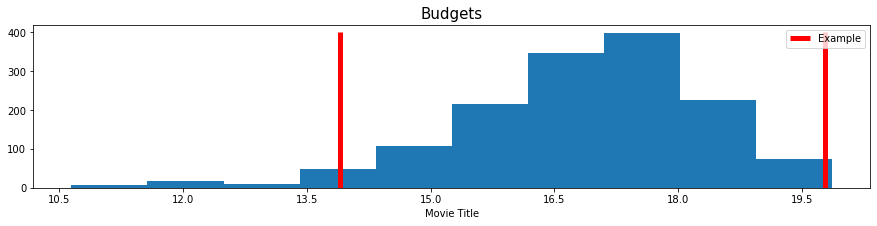

In [26]:
fig, ax = plt.subplots(figsize=(15,3))

frame = movie_overview_dropDuplicates[movie_overview_dropDuplicates.production_budget > 0]
frame['logged_budget'] = np.log(frame.production_budget)
ax.hist(frame.logged_budget)
upper_thresh = frame.logged_budget.mean() + frame.logged_budget.std() * 2
lower_thresh = frame.logged_budget.mean() - frame.logged_budget.std() * 2
ax.vlines(lower_thresh, ymin=0, ymax=400, lw=5, color='red')
ax.vlines(upper_thresh, ymin=0, ymax=400, lw=5, color='red')

# Add labels for x and y axes
ax.set_xlabel('Movie Title')


# Add a title for the plot
ax.set_title('Budgets', fontsize=15)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
# add a legend 
ax.legend(["Example"], loc=1);

In [27]:
budget_frame = frame[(frame.logged_budget > lower_thresh) & (frame.logged_budget < upper_thresh)]
budget_frame.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count,logged_budget
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,95000000,223050874,32657,26.691,2010-02-11,6.1,4229,18.369387
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,3000000,4570178,40247,5.945,2010-01-22,6.3,81,14.914123


In [28]:
budget_frame['movie_profit'] = budget_frame.worldwide_gross - budget_frame.production_budget
budget_frame

<ipython-input-28-0285e3f57843>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_frame['movie_profit'] = budget_frame.worldwide_gross - budget_frame.production_budget


,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count,logged_budget,movie_profit
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,95000000,223050874,32657,26.691,2010-02-11,6.1,4229,18.369387,128050874
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,3000000,4570178,40247,5.945,2010-01-22,6.3,81,14.914123,1570178
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,31500000,38771262,302156,13.651,2016-04-15,5.9,897,17.265498,7271262
5,Going the Distance,It's timelier and a little more honest than mo...,"Drew Barrymore, Justin Long, Charlie Day, Jaso...",New Line Cinema,Rotten,54.0,52.0,77,32000000,43603990,38073,8.281,2010-09-03,6.0,394,17.281246,11603990
9,Moonlight,Moonlight uses one man's story to offer a rema...,"Naomie Harris, André Holland, Mahershala Ali, ...",A24 Films,Certified-Fresh,98.0,79.0,7,1500000,65245512,376867,15.948,2016-10-21,7.4,3893,14.220976,63745512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,85000000,83080084,285135,4.180,2014-08-16,3.8,49,18.258162,-1919916
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,80000000,170805525,38317,10.764,2011-07-08,5.3,886,18.197537,90805525
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,50000000,55348693,329833,12.997,2016-02-12,4.7,1374,17.727534,5348693
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,35000000,12506188,351065,3.434,2016-09-02,5.5,43,17.370859,-22493812


In [29]:
budget_frame = budget_frame.drop(['worldwide_gross'], axis = 1)

In [30]:
movie_actor_budget = budget_frame[['movie_title', 'actors', 'tomatometer_status','tomatometer_rating','movie_profit','production_budget']].sort_values(by='tomatometer_rating', ascending = False)
                            
movie_actor_budget.reset_index(level=0, inplace=True)

In [31]:
movie_actor_budget = movie_actor_budget.drop(['index'], axis = 1)

In [32]:
movie_actor_budget   #.iloc[:100]

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Toy Story,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Certified-Fresh,100.0,334545516,30000000
1,Toy Story 2,"Tim Allen, Joan Cusack, Kelsey Grammer, Don Ri...",Certified-Fresh,100.0,421358276,90000000
2,Gloria,"Paulina García, Sergio Hernández, Diego Fontec...",Certified-Fresh,99.0,-25032507,30000000
3,Le Havre,"André Wilms, Kati Outinen, Jean-Pierre Darrous...",Certified-Fresh,99.0,7980196,5500000
4,Lady Bird,"Saoirse Ronan, Laurie Metcalf, Tracy Letts, Lu...",Certified-Fresh,99.0,68610769,10000000
...,...,...,...,...,...,...
1383,Gotti,"John Travolta, Spencer Rocco Lofranco, Pruitt ...",Rotten,0.0,-3910900,10000000
1384,The Disappointments Room,"Kate Beckinsale, Mel Raido, Gerald McRaney, Lu...",Rotten,0.0,-11496239,15000000
1385,Max Steel,"Ben Winchell, Maria Bello, Ana Villafañe, Josh...",Rotten,0.0,-5436920,10000000
1386,Cabin Fever,"Gage Golightly, Matthew Daddario, Nadine Crock...",Rotten,0.0,28851664,1500000


In [39]:
movie_actor_budget.corr()

,tomatometer_rating,movie_profit,production_budget
tomatometer_rating,1.000000,0.207827,0.025463
movie_profit,0.207827,1.000000,0.653511
production_budget,0.025463,0.653511,1.000000


In [ ]:
movie_actor_budget

/Users/jordanjones/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


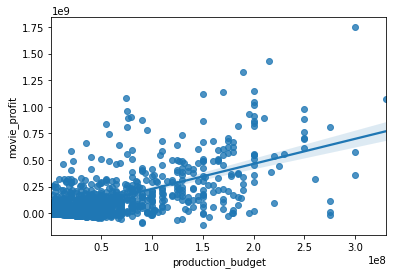

In [51]:
x = movie_actor_budget.production_budget
y = movie_actor_budget.movie_profit

sns.regplot(x,y);

**How to compare the tomatometer with budget**

In [33]:
first100 = movie_actor_budget.copy()
first100.actors = first100.actors.str.split(',')
first100

new100 = first100.explode('actors')
new100

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Toy Story,Tom Hanks,Certified-Fresh,100.0,334545516,30000000
0,Toy Story,Tim Allen,Certified-Fresh,100.0,334545516,30000000
0,Toy Story,Don Rickles,Certified-Fresh,100.0,334545516,30000000
0,Toy Story,Jim Varney,Certified-Fresh,100.0,334545516,30000000
0,Toy Story,Wallace Shawn,Certified-Fresh,100.0,334545516,30000000
...,...,...,...,...,...,...
1387,London Fields,Billy Bob Thornton,Rotten,0.0,-7566268,8000000
1387,London Fields,Cara Delevingne,Rotten,0.0,-7566268,8000000
1387,London Fields,Jason Isaacs,Rotten,0.0,-7566268,8000000
1387,London Fields,Jaimie Alexander,Rotten,0.0,-7566268,8000000


In [34]:
new100[new100['actors'].str.contains("Robert Downey Jr.")]

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
115,Spider-Man: Homecoming,Robert Downey Jr.,Certified-Fresh,92.0,705166350,175000000
135,Captain America: Civil War,Robert Downey Jr.,Certified-Fresh,91.0,890069413,250000000
197,Zodiac,Robert Downey Jr.,Certified-Fresh,89.0,-1919916,85000000
280,Avengers: Infinity War,Robert Downey Jr.,Certified-Fresh,85.0,1748134200,300000000
380,Iron Man 3,Robert Downey Jr.,Certified-Fresh,79.0,1015392272,200000000
424,Avengers: Age of Ultron,Robert Downey Jr.,Certified-Fresh,76.0,1072413963,330600000
492,Iron Man 2,Robert Downey Jr.,Certified-Fresh,72.0,451156389,170000000
522,Restoration,Robert Downey Jr.,Fresh,70.0,-13900000,18000000
531,Sherlock Holmes,Robert Downey Jr.,Fresh,69.0,408438212,90000000
676,Sherlock Holmes: A Game of Shadows,Robert Downey Jr.,Rotten,59.0,410663443,125000000


In [35]:
new100['actors'].value_counts().head(10)

 Jr.                49
 Michael Peña       21
 Joe Chrest         21
 Anthony Mackie     19
 Stanley Tucci      19
 Morgan Freeman     17
 Woody Harrelson    17
 Maya Rudolph       16
 J.K. Simmons       16
 Kristen Wiig       16
Name: actors, dtype: int64

In [36]:
movie_actor_budget.iloc[100:200]

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
100,Thor: Ragnarok,"Chris Hemsworth, Tom Hiddleston, Mark Ruffalo,...",Certified-Fresh,93.0,666980024,180000000
101,Sorry to Bother You,"LaKeith Stanfield, Tessa Thompson, Armie Hamme...",Certified-Fresh,93.0,15085560,3200000
102,Another Year,"Jim Broadbent, Ruth Sheen, Lesley Manville, Ol...",Certified-Fresh,93.0,12005613,8000000
103,Hugo,"Ben Kingsley, Sacha Baron Cohen, Asa Butterfie...",Certified-Fresh,93.0,47784,180000000
104,First Reformed,"Ethan Hawke, Amanda Seyfried, Cedric the Enter...",Certified-Fresh,93.0,374772,3500000
...,...,...,...,...,...,...
195,The World's End,"Simon Pegg, Nick Frost, Paddy Considine, Marti...",Certified-Fresh,89.0,27508505,20000000
196,A Most Violent Year,"Oscar Isaac, Jessica Chastain, David Oyelowo, ...",Certified-Fresh,89.0,-11153125,20000000
197,Zodiac,"Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Certified-Fresh,89.0,-1919916,85000000
198,Blade Runner 2049,"Ryan Gosling, Harrison Ford, Ana de Armas, Syl...",Certified-Fresh,88.0,74357408,185000000


In [37]:
movie_actor_budget.iloc[200:300]

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
200,Wild,"Reese Witherspoon, Thomas Sadoski, Michiel Hui...",Certified-Fresh,88.0,37460543,15000000
201,Annihilation,"Natalie Portman, Jennifer Jason Leigh, Gina Ro...",Certified-Fresh,88.0,-11929085,55000000
202,Rush,"Chris Hemsworth, Olivia Wilde, Alexandra Maria...",Certified-Fresh,88.0,60230839,38000000
203,The Verdict,"Paul Newman, James Mason, Jack Warden, Charlot...",Fresh,88.0,37977250,16000000
204,The Post,"Meryl Streep, Tom Hanks, Alison Brie, Sarah Pa...",Certified-Fresh,88.0,129748880,50000000
...,...,...,...,...,...,...
295,While We're Young,"Ben Stiller, Naomi Watts, Amanda Seyfried, Ada...",Certified-Fresh,84.0,7503828,10000000
296,Hacksaw Ridge,"Andrew Garfield, Teresa Palmer, Hugo Weaving, ...",Certified-Fresh,84.0,128904682,40000000
297,21 Jump Street,"Jonah Hill, Channing Tatum, Brie Larson, Rob R...",Certified-Fresh,84.0,160812429,42000000
298,Dragonslayer,"Peter MacNicol, Caitlin Clarke, Ralph Richards...",Fresh,84.0,-12000000,18000000
